In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
house=pd.read_csv('HousePrices.csv')

In [3]:
house.head()

,HomeID,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [4]:
house=house.drop(['HomeID'],axis=1)

In [5]:
house.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,114300,1790,2,2,2,No,East
1,114200,2030,4,2,3,No,East
2,114800,1740,3,2,1,No,East
3,94700,1980,3,2,3,No,East
4,119800,2130,3,3,3,No,East


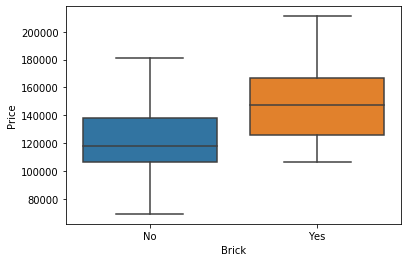

In [6]:
sns.boxplot(x='Brick',y='Price',data=house)

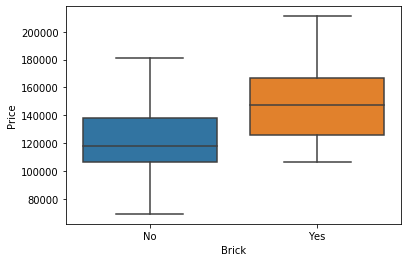

In [7]:
sns.boxplot(x='Brick',y='Price',data=house)

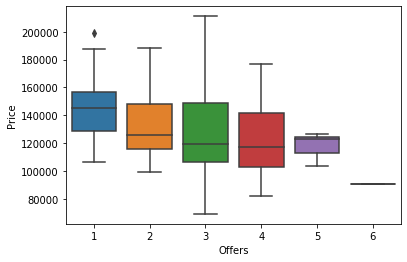

In [8]:
sns.boxplot(x='Offers',y='Price',data=house)

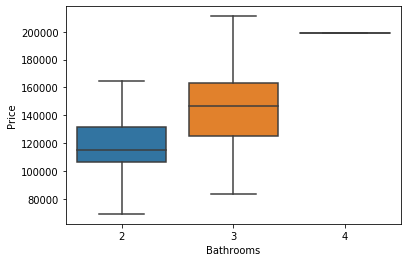

In [9]:
sns.boxplot(x='Bathrooms',y='Price',data=house)

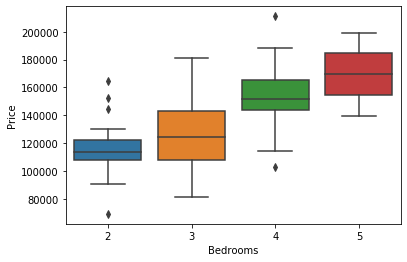

In [10]:
sns.boxplot(x='Bedrooms',y='Price',data=house)

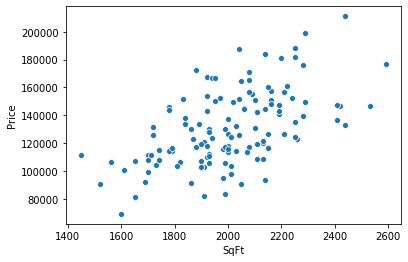

In [11]:
sns.scatterplot(x='SqFt',y='Price',data=house)

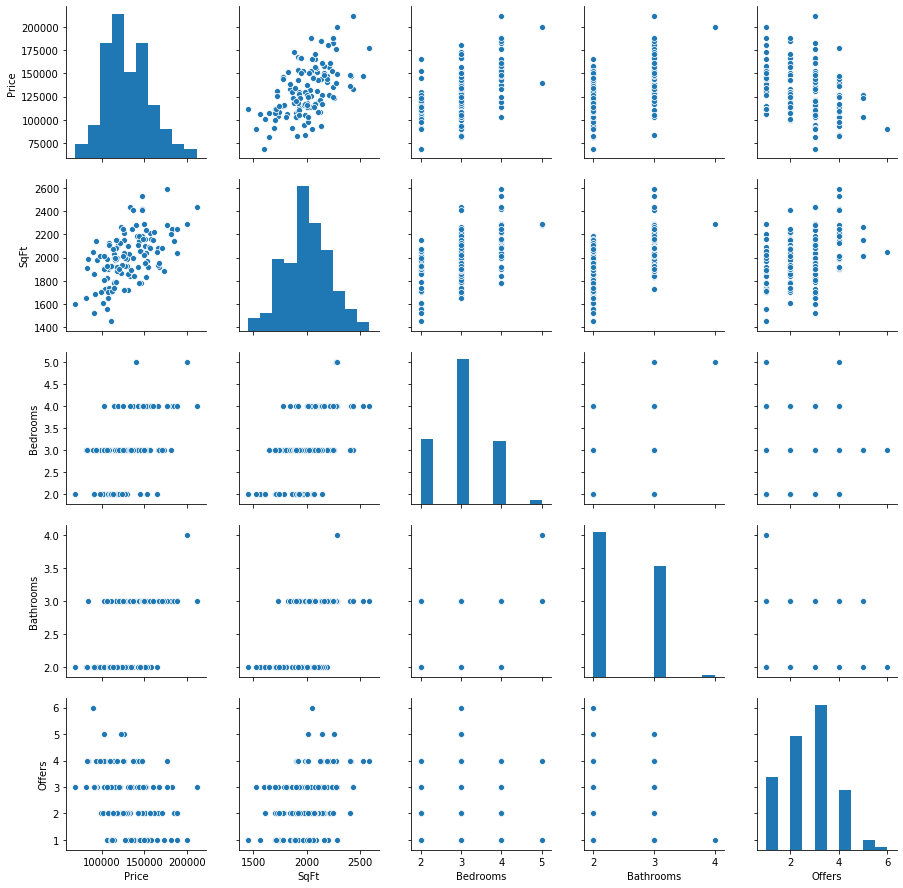

In [12]:
sns.pairplot(house)

In [13]:
house.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,114300,1790,2,2,2,No,East
1,114200,2030,4,2,3,No,East
2,114800,1740,3,2,1,No,East
3,94700,1980,3,2,3,No,East
4,119800,2130,3,3,3,No,East


In [14]:
cat_vars=['Brick','Neighborhood']
for var in cat_vars:
    col_dummies = pd.get_dummies(house[var], prefix=var)
    house = pd.concat([house, col_dummies], axis=1)
    house.drop( var, axis = 1, inplace = True )


print(house.shape)
print(house.head())

(128, 10)
    Price  SqFt  Bedrooms  Bathrooms  Offers  Brick_No  Brick_Yes  \
0  114300  1790         2          2       2         1          0   
1  114200  2030         4          2       3         1          0   
2  114800  1740         3          2       1         1          0   
3   94700  1980         3          2       3         1          0   
4  119800  2130         3          3       3         1          0   

   Neighborhood_East  Neighborhood_North  Neighborhood_West  
0                  1                   0                  0  
1                  1                   0                  0  
2                  1                   0                  0  
3                  1                   0                  0  
4                  1                   0                  0  


In [15]:
house.columns

Index(['Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick_No',
       'Brick_Yes', 'Neighborhood_East', 'Neighborhood_North',
       'Neighborhood_West'],
      dtype='object')

In [16]:
from sklearn.model_selection import train_test_split
X=house[['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick_No',
       'Brick_Yes', 'Neighborhood_East', 'Neighborhood_North',
       'Neighborhood_West']]
y=house['Price']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
pred=lm.predict(X_test)

In [20]:
pred

array([114821.28281713,  95894.88509546, 160033.75618831, 131603.37276385,
       154618.81709079, 139435.84228728, 146829.25044084,  94485.96428328,
       177403.52824425, 135510.12690034, 168965.84271236,  98946.04426472,
       132458.96773107, 124044.31894698, 144300.84650236, 130080.47732384,
       110773.65323784, 136436.35294111, 123188.94432017,  78158.82191405,
       122605.53197626, 128980.86032321, 126813.29546007, 124622.82840844,
       167142.76531014,  97042.72246038, 152902.94340193, 121012.6125074 ,
        88511.75581145, 101832.79976416,  97545.89040217, 105810.40531461,
       158096.70415825, 158919.64135125, 121157.56344754, 101625.54401928,
       101086.08227436, 139316.77050902, 177460.51555817,  92261.41210622,
       161340.62893382, 109329.54877629, 163306.2555429 ])

In [21]:
print('Coefficients : \n', lm.coef_)

Coefficients : 
 [   65.34363728  2994.17185535  6091.63255847 -9091.12190464
 -8781.26883112  8781.26883112 -8705.95587372 -5646.02975483
 14351.98562856]


In [22]:
df = pd.DataFrame(X_train.columns,lm.coef_ )
print(df.shape)
print(df)

(9, 1)
                                0
 65.343637                   SqFt
 2994.171855             Bedrooms
 6091.632558            Bathrooms
-9091.121905               Offers
-8781.268831             Brick_No
 8781.268831            Brick_Yes
-8705.955874    Neighborhood_East
-5646.029755   Neighborhood_North
 14351.985629   Neighborhood_West


In [23]:
lm.score(X_test,y_test)

0.8280608599590689

In [24]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': pred})  
df1

,Actual,Predicted
55,125700,114821.282817
40,106600,95894.885095
19,167200,160033.756188
31,112300,131603.372764
98,145500,154618.817091
56,140900,139435.842287
69,165600,146829.250441
104,82300,94485.964283
81,184300,177403.528244
26,137000,135510.126900


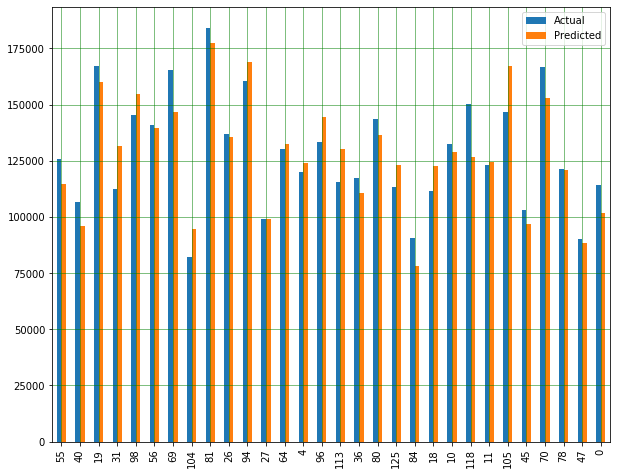

In [25]:
df2 = df1.head(30)
df2.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()